# Proyecto de Gestión y Almacenamiento de Datos

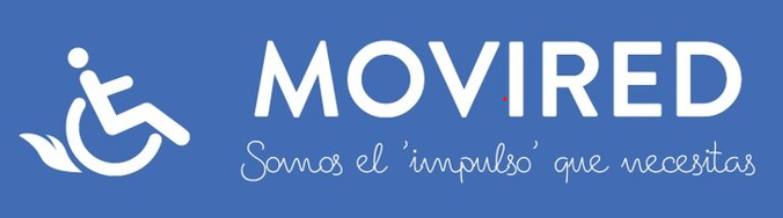
# *Movired Soluciones Logísticas SAS es una empresa creada desde hace poco más de un año por tres ingenieros de la Ciudad de Cali – Valle; con el objetivo de brindar una solución a la problemática del transporte que poseen las personas en condición de movilidad reducida.*

#### Movired Soluciones Logísticas SAS ha obtenido una base de datos proveniente de ********* que contiene todos los pacientes atendidos de enero a Agosto de 2021 en su operación en las ciudades de Cali, Medellín, Bogotá, Barranquilla y Cartagena.

- El objetivo del análisis de la base de datos de las atenciones de ********* es identificar principalmente en la ciudad de Cali usuarios potenciales que pueden estar interesados en el servicio de transporte ofrecido por Movired Soluciones Logísticas; entre estos posibles usuarios se requiere determinar y seleccionar las personas que se encuentran en condición de movilidad reducida o que podrían requerir para su movilización un transporte especial sin estar propiamente en condición de movilidad reducida debido a temas de comodidad por su condición de salud o edad avanzada.

- Así mismo se plantea identificar otro tipo de poblaciones a las que se pueda extender el servicio especial de transporte de pasajeros; tales como personas que frecuentemente en la semana y/o en el mes requieren de desplazarse a centros médicos como hospitales y centros de rehabilitación; que no necesariamente se encuentran en condición de movilidad reducida.

- Finalmente, con miras a la expansión del servicio ofrecido por Movired en la ciudad de Cali, se requiere de un análisis pre liminar que permita identificar la próxima o próximas ciudades donde el servicio ofrecido sea ampliamente recibido; en función de la cantidad de usuarios potenciales que podrían estar interesados en el mismo.

Entrega 1: Analisis de la Base de Datos

In [1]:
# Se importan las librerias necesarias para realizar el analisis de la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb
from datetime import datetime

In [2]:
def validar_nombre(nombre):
    """
        Función que determina la validez de un nombre
    """
    
    invalido_1 = 0
    invalido_2 = 0
    invalido_3 = 0
    
    nombre = nombre.upper()
    
    numeros = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]
    generos = ["MASCULINO", "FEMENINO"]
    palabras = ["AÑO", "AÑOS", "CALLE", "CARRERA", "DIAGONAL", "AVENIDA"]
    
    for numero in numeros:
        
        if numero in nombre:
            
            invalido_1 = invalido_1 + 1
    
    for genero in generos:
        
        if genero in nombre:
            
            invalido_2 = invalido_2 + 1
    
    for palabra in palabras:
        
        if palabra in nombre:
            
            invalido_3 = invalido_3 + 1
    
    if invalido_1 + invalido_2 + invalido_3 == 0:
        
        valido = 1
    
    else:
        
        valido = 0
    
    return valido    
    

In [3]:
def validar_telefonos(numero, opcion_tel):
    """
        Función que determina la validez de un número telefonico y/o celular.
    """
    
    numero_str = str(numero)
    
    longitud_admitida = 10 if opcion_tel == 1 else 7
    
    cadena_invalida_0 = "0000000"
    cadena_invalida_1 = "1111111"
    cadena_invalida_2 = "2222222"
    cadena_invalida_3 = "3333333"
    cadena_invalida_4 = "4444444"
    cadena_invalida_5 = "5555555"
    cadena_invalida_6 = "6666666"
    cadena_invalida_7 = "7777777"
    cadena_invalida_8 = "8888888"
    cadena_invalida_9 = "9999999"
    cadena_invalida_suc = "1234567"
    
    indicativos = ["300","301","302","303","304","305","310","311","312","313","314","315","316","317","318","319","320","321","322","323","350","351"]
    
    
    if (len(numero_str) == longitud_admitida 
        and cadena_invalida_0 not in numero_str
        and cadena_invalida_1 not in numero_str 
        and cadena_invalida_2 not in numero_str 
        and cadena_invalida_3 not in numero_str 
        and cadena_invalida_4 not in numero_str 
        and cadena_invalida_5 not in numero_str 
        and cadena_invalida_6 not in numero_str 
        and cadena_invalida_7 not in numero_str 
        and cadena_invalida_8 not in numero_str 
        and cadena_invalida_9 not in numero_str 
        and cadena_invalida_suc not in numero_str
        and ((opcion_tel == 1 and numero_str[0:3] in indicativos) or opcion_tel == 2)):
        
        valido = 1
        
    else:
        
        valido = 0     
    
    return valido

### Se carga la base de datos:

In [4]:
usuarios_data = pd.read_excel("BD Atenciones 2021.xlsx")
display(usuarios_data.head())
print(usuarios_data.shape)

,ATENCION,ID MEDICO,PROFESIONAL,ID PARAMEDICO,PARAMEDICO,MUNICIPIO,NOMBRE,DOCUMENTO,EDAD,FECHA NACIMIENTO,...,TX FINAL,TX EFECTIVIDAD,x,X2,RE CONSULTA TEMPRANA,RE CONSULTA TARDIA,ATENCION TELEFONICA,SEMESTRE,VALIDADOR DE TIEMPO PERDIDO,TIEMPO PERDIDO DEL ARRIBO AL INICIO DE AT
0,4033933,NaN,NaN,NaN,NaN,CARTAGENA DE INDIAS,DANTHI JOSUE GUTIERREZ MARIN,1201256679,4,2016-08-04 00:00:00,...,0,SUBTRIAGE,NaN,NaN,NaN,NaN,NaN,1,NO,0.000000
1,4033936,5.522548e+07,ANGIE CORONELL ORTIZ,8.533220e+06,PROSPERO ANTEQUERA CARBONELL ANTEQUERA,BARRANQUILLA,ISAAC RICO LABARRERA,1044227631,3,2017-10-05 00:00:00,...,3,SUBTRIAGE,NaN,NaN,NaN,NaN,NaN,1,NO,7.306383
2,4033938,3.432343e+07,LEYDY CRISTINA LOPEZ JARAMILLO,9.430452e+07,JORGE ENRIQUE LEMOS DAVILA,CALI,ENRIQUE NAVARRETE TULIO,2664159,94,1926-06-24 00:00:00,...,2,SOBRETRIAGE,NaN,NaN,NaN,NaN,NaN,1,SI,26.689533
3,4033939,1.129579e+09,HOWARD REGUILLO BONILLA,1.040736e+09,JUAN DAVID RESTREPO SIERRA,MEDELLIN,HORTENCIA ARANGO DE PATIÑO,48708712,74,1946-03-01 00:00:00,...,3,SUBTRIAGE,NaN,NaN,NaN,NaN,NaN,1,NO,7.871250
4,4033940,1.128051e+09,ADELINA MEZA HURTADO,8.853133e+06,HERNAN MANCILLA GOMEZ MANCILLA,CARTAGENA DE INDIAS,HUGO MANUEL MORALES BARRETO,13879356,72,1948-07-31 00:00:00,...,1,SUBTRIAGE,NaN,NaN,NaN,NaN,NaN,1,SI,116.345733


(66370, 104)


### Se seleccionan las columnas de interes o que podrían tener datos de interes:

In [5]:
usuarios_data = usuarios_data[["MUNICIPIO", "NOMBRE", "DOCUMENTO", "EDAD", "FECHA NACIMIENTO", "GENERO", "DIRECCION", "BARRIO", "TELEFONO", "CELULAR", "FECHA LLAMADA", "TIPO ATENCION", "TARJETA DESPACHO", "TARJETA DESPACHO OBSERVACION", "CODIGO DIAGNOSTICO 1", "DESCRIPCION DIAGNOSTICO 1", "CODIGO PROCEDIMEINTO 1", "DESCRIPCION PROCEDIMIENTO 1", "TIPO MOVIL", "EPS USUARIO", "IPS TRASLADO"]]
usuarios_data = usuarios_data.rename(columns = {"FECHA NACIMIENTO": "FECHA_NACIMIENTO", "FECHA LLAMADA": "FECHA_LLAMADA", "TIPO ATENCION": "TIPO_ATENCION", "TARJETA DESPACHO": "TARJETA_DESPACHO", "TARJETA DESPACHO OBSERVACION": "OBSERVACIONES", "CODIGO DIAGNOSTICO 1": "COD_DIAGNOSTICO", "DESCRIPCION DIAGNOSTICO 1": "DESC_DIAGNOSTICO", "CODIGO PROCEDIMEINTO 1": "COD_PROCEDIMIENTO" ,"DESCRIPCION PROCEDIMIENTO 1": "DESC_PROCEDIMIENTO", "TIPO MOVIL": "TIPO_VEHICULO", "EPS USUARIO": "EPS", "IPS TRASLADO": "IPS"})
display(usuarios_data.head())

,MUNICIPIO,NOMBRE,DOCUMENTO,EDAD,FECHA_NACIMIENTO,GENERO,DIRECCION,BARRIO,TELEFONO,CELULAR,...,TIPO_ATENCION,TARJETA_DESPACHO,OBSERVACIONES,COD_DIAGNOSTICO,DESC_DIAGNOSTICO,COD_PROCEDIMIENTO,DESC_PROCEDIMIENTO,TIPO_VEHICULO,EPS,IPS
0,CARTAGENA DE INDIAS,DANTHI JOSUE GUTIERREZ MARIN,1201256679,4,2016-08-04 00:00:00,Masculino,B/GAVIOTAS MZ 27 LT 10 ETP 2 CS 2 PISO PR DG...,LAS GAVIOTAS,3008042489,3008042489,...,CONSULTA,CEFALEA,cc 3 dias d eev tos mg fiebre intermitente an...,NaN,NaN,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,NaN,SALUD TOTAL S.A E.P.S.,NaN
1,BARRANQUILLA,ISAAC RICO LABARRERA,1044227631,3,2017-10-05 00:00:00,Masculino,CR 7E 40 17 CS-APTO/4 B/MAGDALENA,LA MAGDALENA,3004494457,3004494457,...,CONSULTA,DOLOR ABDOMINAL,"DOLOR ABDOMINAL DIAREA, EMESIS, ADINAMIA ,EV 2...",A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,AMBULANCIA MEDICALIZADA,EPS Y MP SURAMERICANA S.A.,NaN
2,CALI,ENRIQUE NAVARRETE TULIO,2664159,94,1926-06-24 00:00:00,Masculino,CR 24 C BIS # 2 -90 OESTE CS B/ SAN FERNANDO,SAN FERNANDO,3022640206,3022640206,...,EMERGENCIA,PROBLEMAS RESPIRATORIOS,"CC 20 MIN CIANOSIS DISTAL, NO RESPONDE A ESTIM...",R98,MUERTE SIN ASISTENCIA ...,890701,"CONSULTA DE URGENCIAS, POR MEDICINA GENERAL",AMBULANCIA MEDICALIZADA,COOMEVA E.P.S. S.A.,NaN
3,MEDELLIN,HORTENCIA ARANGO DE PATIÑO,48708712,74,1946-03-01 00:00:00,Femenino,"CL38BSUR 26 02, AP.1428 T1 UR MONTE PIETRA",CAMINO VERDE,4870812,3117465784,...,CONSULTA,CAIDAS,"HACE 8 H SUFRIO CAIDA DE SU ALT. ,AHORA DOLOR ...",M545,LUMBAGO NO ESPECIFICADO ...,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,AMBULANCIA BASICA,NaN,NaN
4,CARTAGENA DE INDIAS,HUGO MANUEL MORALES BARRETO,13879356,72,1948-07-31 00:00:00,Masculino,REPÚBLICA DE CHILE ETP-4 MZ-78 LT-5 CASA. PR...,REPÚBLICA DE CHILE,3145313480,3145313480,...,CONSULTA,PROBLEMAS RESPIRATORIOS,"CC AHORA V/DIAS FIEBRE,MIALGIAS,CONGESTION AH...",J128,NEUMONIA DEBIDA A OTROS VIRUS ...,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,AMBULANCIA MEDICALIZADA,COOMEVA E.P.S. S.A.,NaN


### Se verifican los tipos de datos de las columnas seleccionadas:

In [6]:
print(usuarios_data.dtypes)

MUNICIPIO                     object
NOMBRE                        object
DOCUMENTO                      int64
EDAD                           int64
FECHA_NACIMIENTO              object
GENERO                        object
DIRECCION                     object
BARRIO                        object
TELEFONO                       int64
CELULAR                        int64
FECHA_LLAMADA         datetime64[ns]
TIPO_ATENCION                 object
TARJETA_DESPACHO              object
OBSERVACIONES                 object
COD_DIAGNOSTICO               object
DESC_DIAGNOSTICO              object
COD_PROCEDIMIENTO             object
DESC_PROCEDIMIENTO            object
TIPO_VEHICULO                 object
EPS                           object
IPS                           object
dtype: object


### Se determina el periodo de tiempo durante el cual se han prestado los servicios:

In [7]:
fecha_min = usuarios_data["FECHA_LLAMADA"].dt.strftime("%Y-%m-%d").min()
fecha_max = usuarios_data["FECHA_LLAMADA"].dt.strftime("%Y-%m-%d").max()

### Se identifica la cantidad de servicios medicos realizados por ciudad:

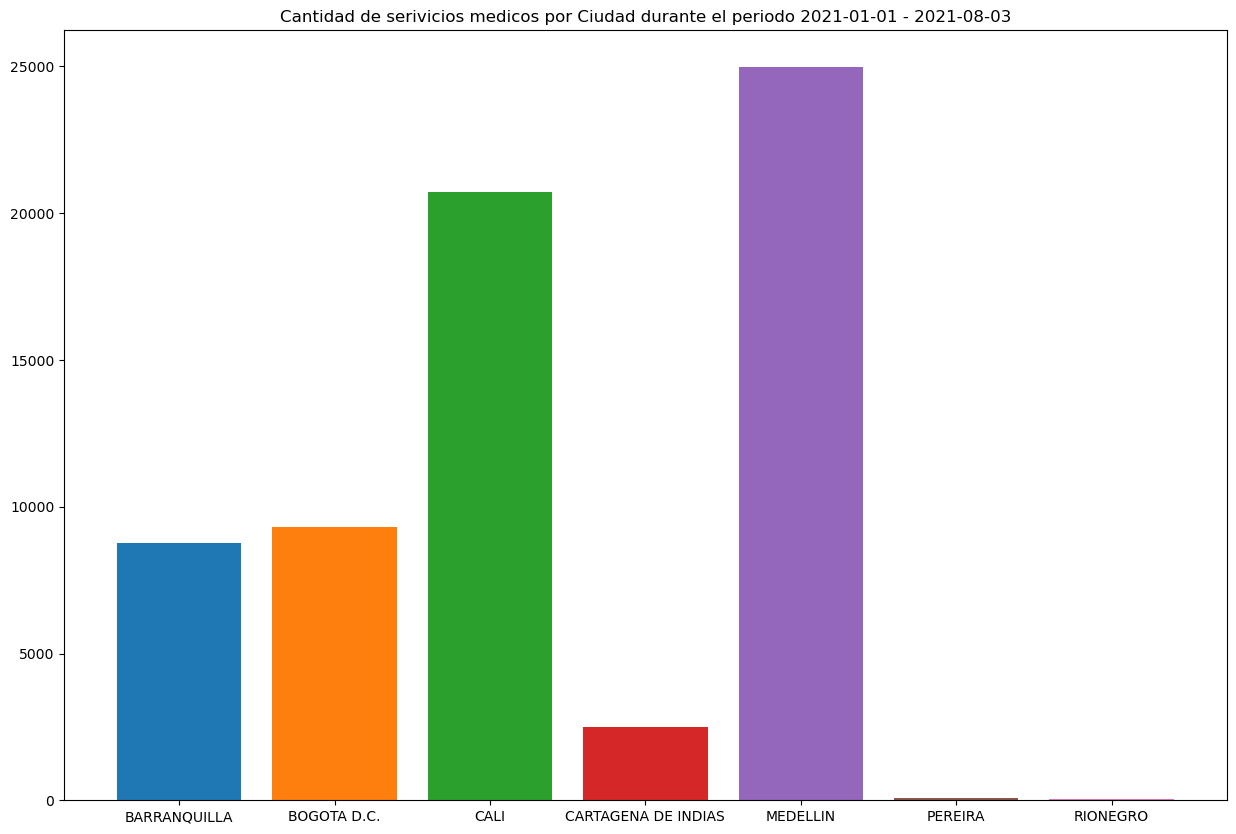

In [8]:
servicios_ciudad = pd.DataFrame(usuarios_data.groupby(by = ["MUNICIPIO"]).count().DOCUMENTO)

colors = mcolors.TABLEAU_COLORS

plt.figure(figsize = (15,10))

plt.bar(servicios_ciudad.index.values.tolist(),
        servicios_ciudad.T.values.tolist()[0], 
        color = colors)

plt.title("Cantidad de serivicios medicos por Ciudad durante el periodo {} - {}".format(fecha_min, fecha_max))

plt.show()

### Se identifica la cantidad de usuarios por ciudad:

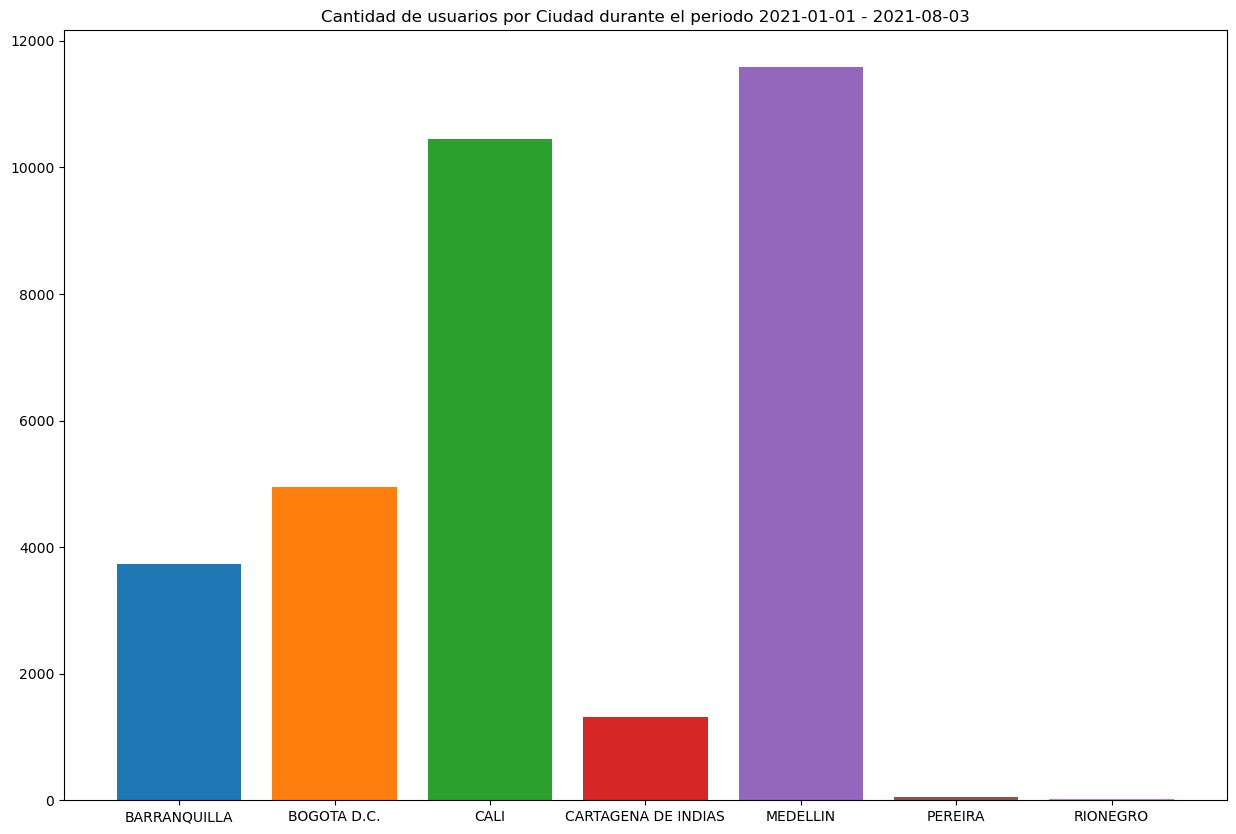

In [9]:
usurios_ciudad = pd.DataFrame(usuarios_data[["MUNICIPIO", "DOCUMENTO"]].drop_duplicates().groupby(by = ["MUNICIPIO"]).count().DOCUMENTO)

colors = mcolors.TABLEAU_COLORS

plt.figure(figsize = (15,10))

plt.bar(usurios_ciudad.index.values.tolist(),
        usurios_ciudad.T.values.tolist()[0], 
        color = colors)

plt.title("Cantidad de usuarios por Ciudad durante el periodo {} - {}".format(fecha_min, fecha_max))

plt.show()

### Se ve la distribución de la cantidad de servicios de cada usuario en Cali:

<Axes: >

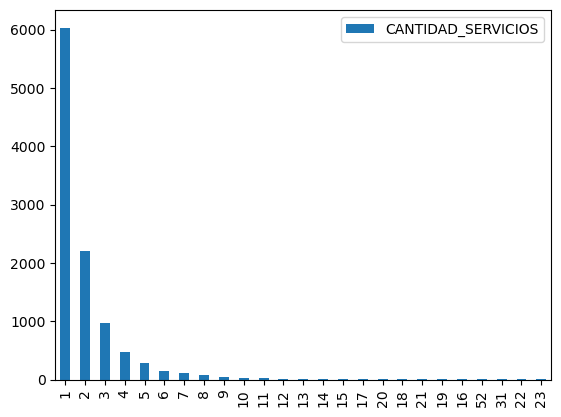

In [10]:
usuarios_cali = usuarios_data.loc[usuarios_data["MUNICIPIO"] == "CALI"]

servicios_usuario_cali = pd.DataFrame(usuarios_cali.groupby(by = ["DOCUMENTO"]).count().NOMBRE)
servicios_usuario_cali = servicios_usuario_cali.rename(columns = {"NOMBRE": "CANTIDAD_SERVICIOS"})
servicios_usuario_cali_hist = pd.DataFrame(servicios_usuario_cali["CANTIDAD_SERVICIOS"].value_counts())

servicios_usuario_cali_hist.plot(kind="bar")


### Se ve la distribución de la cantidad de servicios de cada EPS en Cali; seleccionando las EPS que recibieron al menos el 1% de servicios:

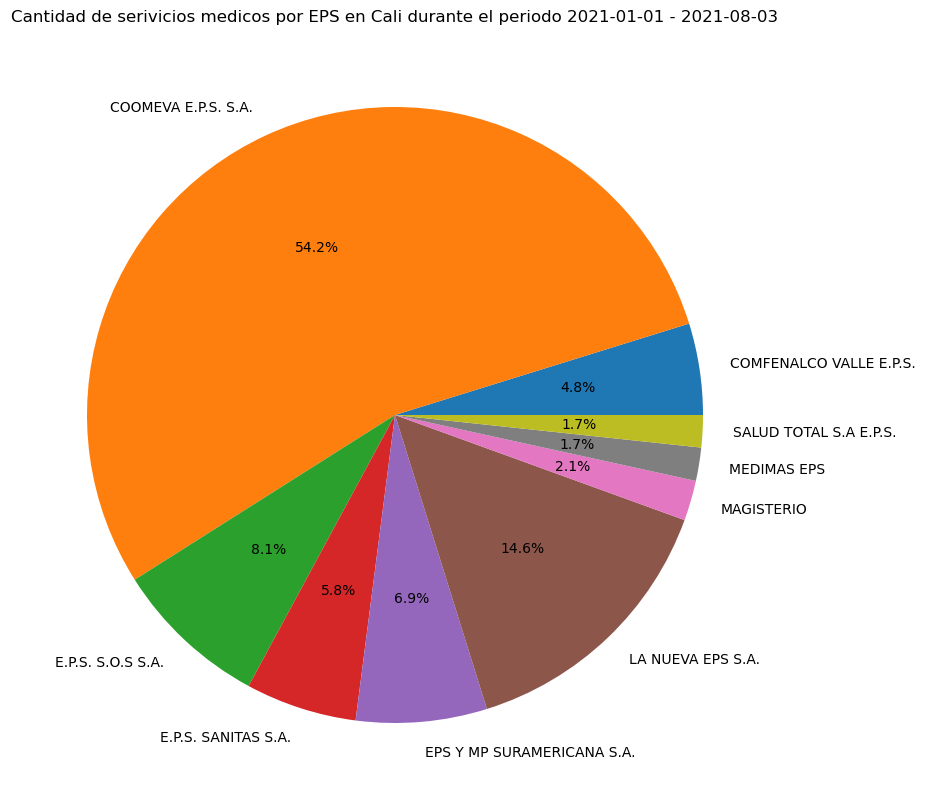

In [11]:
servicios_eps_cali = pd.DataFrame(usuarios_cali.groupby(by = ["EPS"]).count().NOMBRE)
servicios_eps_cali = servicios_eps_cali.rename(columns = {"NOMBRE": "CANTIDAD_SERVICIOS"})
servicios_eps_cali["TOTAL_SERVICIOS"] = servicios_eps_cali["CANTIDAD_SERVICIOS"].sum()
servicios_eps_cali["PORC_SERVICIOS"] = servicios_eps_cali["CANTIDAD_SERVICIOS"]/servicios_eps_cali["TOTAL_SERVICIOS"]

servicios_eps_cali = servicios_eps_cali.loc[servicios_eps_cali["PORC_SERVICIOS"] >= 0.01]

color = mcolors.TABLEAU_COLORS

plt.figure(figsize = (15,10))

plt.pie(labels = servicios_eps_cali.index.values.tolist(),
        x = servicios_eps_cali["PORC_SERVICIOS"].T.values.tolist(), 
        colors = color,
       autopct='%1.1f%%')

plt.title("Cantidad de serivicios medicos por EPS en Cali durante el periodo {} - {}".format(fecha_min, fecha_max))

plt.show()

### Se ve la distribución de la cantidad de servicios de cada IPS en Cali; seleccionando las IPS que recibieron al menos el 3% de servicios:

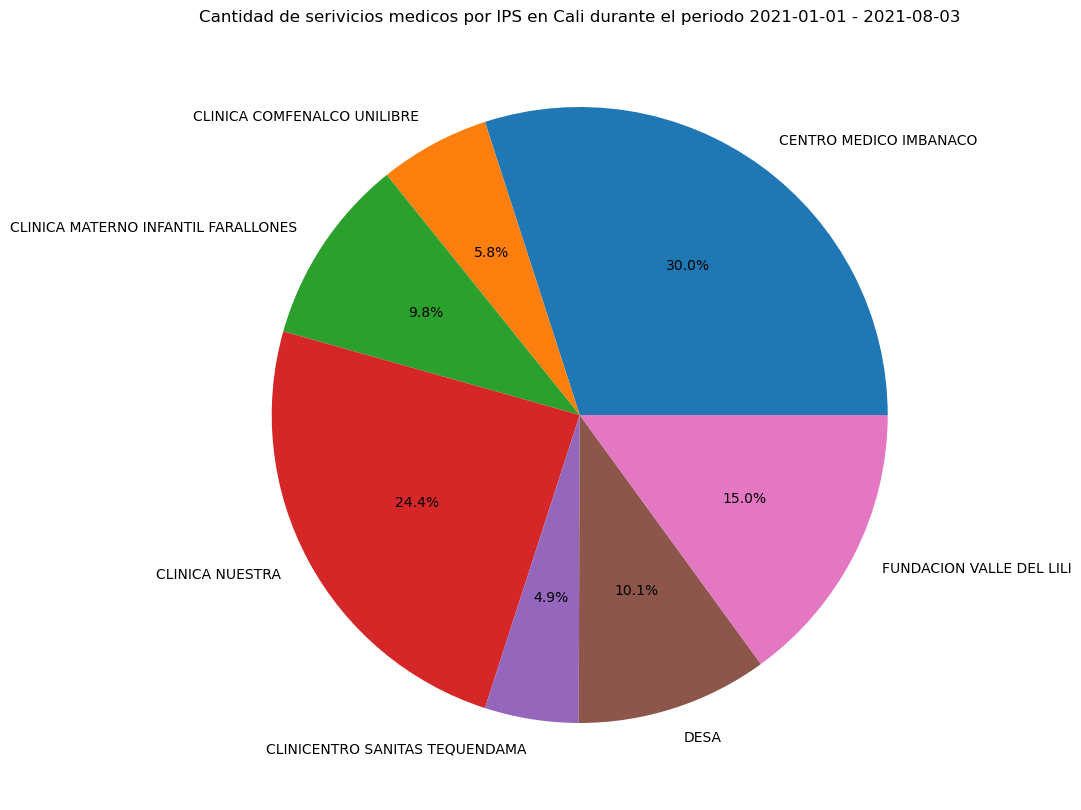

In [12]:
servicios_ips_cali = pd.DataFrame(usuarios_cali.groupby(by = ["IPS"]).count().NOMBRE)
servicios_ips_cali = servicios_ips_cali.rename(columns = {"NOMBRE": "CANTIDAD_SERVICIOS"})
servicios_ips_cali["TOTAL_SERVICIOS"] = servicios_ips_cali["CANTIDAD_SERVICIOS"].sum()
servicios_ips_cali["PORC_SERVICIOS"] = servicios_ips_cali["CANTIDAD_SERVICIOS"]/servicios_ips_cali["TOTAL_SERVICIOS"]

servicios_ips_cali = servicios_ips_cali.loc[servicios_ips_cali["PORC_SERVICIOS"] >= 0.03]

color = mcolors.TABLEAU_COLORS

plt.figure(figsize = (15,10))

plt.pie(labels = servicios_ips_cali.index.values.tolist(),
        x = servicios_ips_cali["PORC_SERVICIOS"].T.values.tolist(), 
        colors = color,
       autopct='%1.1f%%')

plt.title("Cantidad de serivicios medicos por IPS en Cali durante el periodo {} - {}".format(fecha_min, fecha_max))

plt.show()

### Se ve la distribución de la cantidad de servicios atentidos por cada tipo de vehículo en Cali

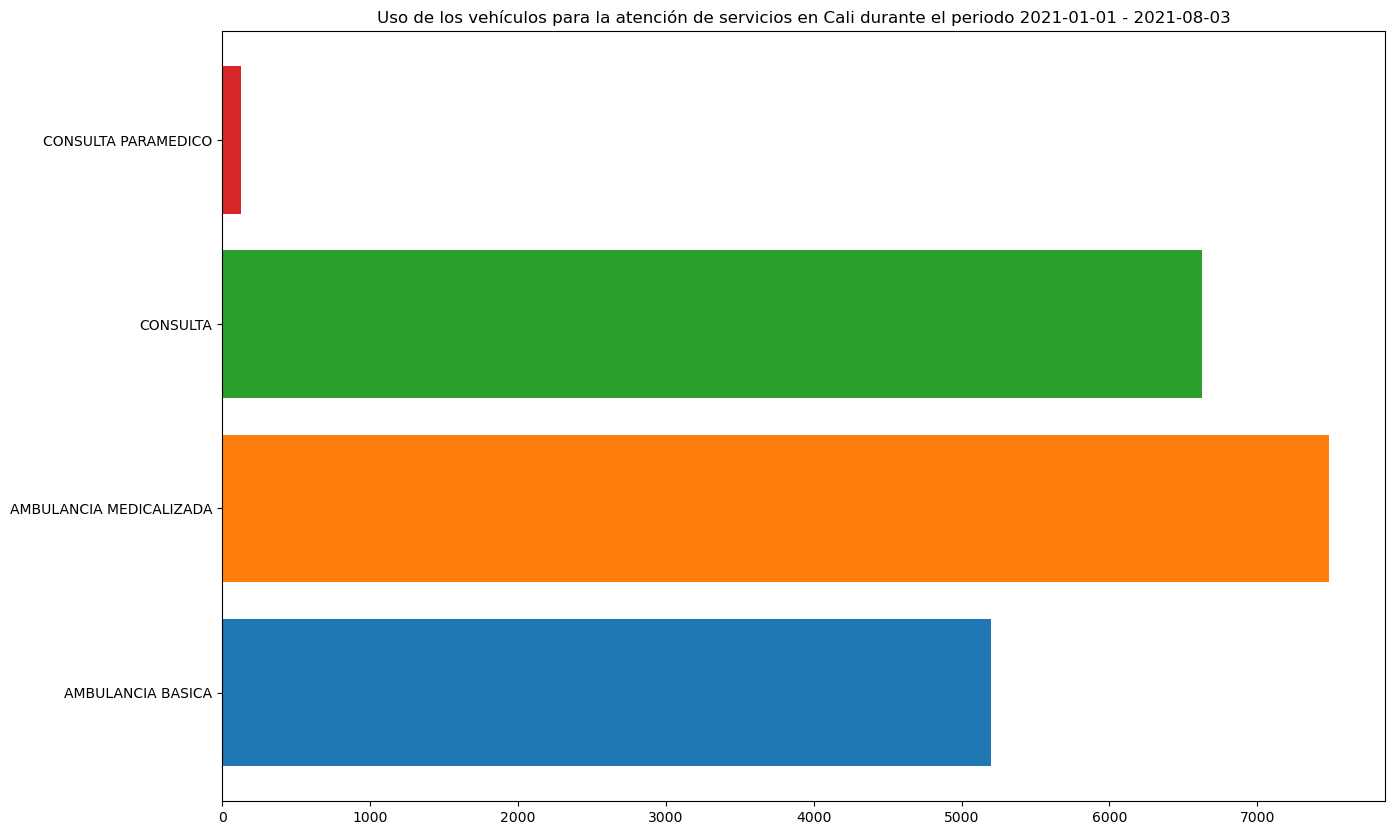

In [13]:
servicios_tipo_vehiculo_cali = pd.DataFrame(usuarios_cali.groupby(by = ["TIPO_VEHICULO"]).count().NOMBRE)
servicios_tipo_vehiculo_cali = servicios_tipo_vehiculo_cali.rename(columns = {"NOMBRE": "CANTIDAD_SERVICIOS"})

colors = mcolors.TABLEAU_COLORS

plt.figure(figsize = (15,10))

plt.barh(servicios_tipo_vehiculo_cali.index.values.tolist(),
        servicios_tipo_vehiculo_cali["CANTIDAD_SERVICIOS"].T.values.tolist(), 
        color = colors)

plt.title("Uso de los vehículos para la atención de servicios en Cali durante el periodo {} - {}".format(fecha_min, fecha_max))

plt.show()

## Se seleccionan los usuarios con mas de 6 servicios durante el periodo de tiempo del analisis:

In [14]:
servicios_usuario_cali = servicios_usuario_cali.loc[servicios_usuario_cali["CANTIDAD_SERVICIOS"]>5].reset_index(drop = False)
usuarios_recurrentes = np.array(servicios_usuario_cali["DOCUMENTO"].values)

## Se separan los registros de los usuarios con al menos seis servicios de los usuarios con menos de seis servicios:

In [15]:
usuarios_recurrentes_cali_data = usuarios_cali.loc[usuarios_cali["DOCUMENTO"].isin(usuarios_recurrentes)]
usuarios_no_recurrentes_cali_data = usuarios_cali.loc[~usuarios_cali["DOCUMENTO"].isin(usuarios_recurrentes)]

### Se identifican los servicios al mes solicitados por cada usuario:

In [16]:
usuarios_recurrentes_cali = usuarios_recurrentes_cali_data[["DOCUMENTO", "NOMBRE", "FECHA_LLAMADA"]]
usuarios_recurrentes_cali["MES_SERVICIO"] = usuarios_recurrentes_cali["FECHA_LLAMADA"].dt.month
usuarios_recurrentes_cali = pd.DataFrame(usuarios_recurrentes_cali.groupby(by = ["DOCUMENTO", "MES_SERVICIO"]).count().NOMBRE)
usuarios_recurrentes_cali = usuarios_recurrentes_cali.rename(columns = {"NOMBRE": "CANTIDAD_SERVICIOS"})
usuarios_recurrentes_cali = usuarios_recurrentes_cali.reset_index(drop = False)
display(usuarios_recurrentes_cali)

C:\Users\franj\AppData\Local\Temp\ipykernel_6592\2376640410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuarios_recurrentes_cali["MES_SERVICIO"] = usuarios_recurrentes_cali["FECHA_LLAMADA"].dt.month


,DOCUMENTO,MES_SERVICIO,CANTIDAD_SERVICIOS
0,68666,1,1
1,68666,2,1
2,68666,3,1
3,68666,4,3
4,68666,7,7
...,...,...,...
1707,1241440901,3,2
1708,1241440901,5,1
1709,1241440901,6,2
1710,3013150258,5,7


### Se seleccionan los usuarios que en promedio han solicitado 3 o mas servicios al mes:

In [17]:
usuarios_recurrentes_cali_mean = pd.DataFrame(usuarios_recurrentes_cali.groupby(by=["DOCUMENTO"]).mean().CANTIDAD_SERVICIOS.round())
usuarios_recurrentes_cali_mean = usuarios_recurrentes_cali_mean.reset_index(drop = False)
usuarios_recurrentes_cali_mean = usuarios_recurrentes_cali_mean.rename(columns = {"CANTIDAD_SERVICIOS": "CANTIDAD_SERVICIOS_PROMEDIO"})
usuarios_recurrentes_cali_mean = usuarios_recurrentes_cali_mean.loc[usuarios_recurrentes_cali_mean["CANTIDAD_SERVICIOS_PROMEDIO"] > 2]
usuarios_recurrentes_cali_mean = usuarios_recurrentes_cali_mean["DOCUMENTO"].drop_duplicates()

usuarios_servicios_prom = usuarios_recurrentes_cali_mean.values

print("Seleccionando los usuarios que en promedio solicitan 3 veces o mas los servicios, se obtienen {} posibles clientes".format(len(usuarios_servicios_prom)))

Seleccionando los usuarios que en promedio solicitan 3 veces o mas los servicios, se obtienen 197 posibles clientes


### Se seleccionan los usuarios que en al menos 1 mes han solicitado 3 o mas servicios:

In [18]:
usuarios_recurrentes_cali_mes = usuarios_recurrentes_cali.loc[usuarios_recurrentes_cali["CANTIDAD_SERVICIOS"] > 2]
usuarios_recurrentes_cali_mes = usuarios_recurrentes_cali_mes["DOCUMENTO"].drop_duplicates()

usuarios_servicios = usuarios_recurrentes_cali_mes.values

print("Seleccionando los usuarios que han solicitan 3 veces o mas los servicios en al menos 1 mes, se obtienen {} posibles clientes".format(len(usuarios_servicios)))

Seleccionando los usuarios que han solicitan 3 veces o mas los servicios en al menos 1 mes, se obtienen 421 posibles clientes


## Se seleccionan como posibles los usuarios que en al menos 1 mes han solicitado 3 o mas servicios

### Se seleccionan los identificadores del usuario: DOCUMENTO - NOMBRE, la información de contacto: CELULAR - TELEFONO - DIRECCION - BARRIO, la información demografica: EDAD - FECHA_NACIMIENTO - GENERO

In [19]:
posibles_usuarios_1 = usuarios_recurrentes_cali_data[["DOCUMENTO", "NOMBRE", "EDAD", "FECHA_NACIMIENTO", "GENERO", "DIRECCION", "BARRIO", "TELEFONO", "CELULAR"]]
posibles_usuarios_1 = posibles_usuarios_1.loc[posibles_usuarios_1["DOCUMENTO"].isin(usuarios_servicios)]
posibles_usuarios_1 = posibles_usuarios_1.drop_duplicates().reset_index(drop = True)
display(posibles_usuarios_1)

,DOCUMENTO,NOMBRE,EDAD,FECHA_NACIMIENTO,GENERO,DIRECCION,BARRIO,TELEFONO,CELULAR
0,1130664462,MICHELLE ADRES BENASSI SANDOVAL,34,1986-04-25 00:00:00,Masculino,CL 9 9-54 APTO 201 AL LADO BBVA B/ JUAN DE AMB...,JAMUNDI,3008001983,3008001983
1,31223293,MARIA DORIA POSSO CHAVEZ,71,1949-05-06 00:00:00,Femenino,CLL 13 E # 65D 34 APTO 204 C CR LOS CANEROS B/...,BOSQUES DEL LIMONAR,3306406,3156966429
2,6044582,DANIEL PEREA,85,1935-04-25 00:00:00,Masculino,CL 66 7N 34 B// CALIMA,CALIMA,5533052,3182682327
3,29000173,FANNY VALENCIA GOMEZ,85,1935-07-20 00:00:00,Femenino,CR 87 # 5 -57 APTO 201 ED PATRICIA B//MAYAPAN...,MAYAPAN-LAS VEGAS,3424692,3117935701
4,29643660,MARIA JESUS BARREIRO,81,1939-12-24 00:00:00,Femenino,CRA 93 28-60 APT H 202 UNIDAD BENEVENTO B/ VALLE,VALLE DEL LILI,3795431,3106037793
...,...,...,...,...,...,...,...,...,...
2943,1107082977,PAULA ANDREA OSPINA NAUFFAL,27,1994-04-09 00:00:00,Femenino,AV 4N 14N 32 CS-APT/302 B/GRANADA LLAMAR AL L...,GRANADA,3157249277,3157249277
2944,2448628,HECTOR LUGO,70,1950-10-10 00:00:00,Masculino,AUTOPISTA SUR CON 66 - EN PANADERIA MAGIST...,EL LIMONAR,3217244882,3217244882
2945,29070188,NELLY AIDEE PEREZ DAVILA,82,1938-08-16 00:00:00,Femenino,CL 7 # 29 - 43 HOGAR SANTA INES B// EL CEDRO,EL CEDRO,5246318,1111111111
2946,38954503,GLADYS MARIA BARRETO DE VALENCIA,84,1937-04-19 00:00:00,Femenino,AV 9 NTE 6 N 100 APT/403 TR/A CJ/BOSQUES DE ...,JUANAMBU,4018196,3122976185


### Debido a que se esperan 421 registros y se obtuvieron 2984 se analiza un caso para identificar los duplicados

In [20]:
posibles_usuarios_1.loc[posibles_usuarios_1["DOCUMENTO"]==72435]

,DOCUMENTO,NOMBRE,EDAD,FECHA_NACIMIENTO,GENERO,DIRECCION,BARRIO,TELEFONO,CELULAR
111,72435,PACIFICO CUBILLOS VILLAMARIN,89,1931-02-10 00:00:00,Masculino,CL 5 E #43 - 27 B/ TEQUENDAMA - HOGAR TEQ...,EL LIDO,4022971,3166294231
137,72435,PACIFICO CUBILLOS VILLAMARIN,89,1931-02-10 00:00:00,Masculino,CRA47 # 3 A 05 ESQUINA B / LIDO HOGAR,EL LIDO,4022971,3166294231
323,72435,PACIFICO CUBILLOS VILLAMARIN,89,1931-02-10 00:00:00,Masculino,CRA 47 # 3 A - 05 ESQUINA HOGAR B / LIDO,EL LIDO,3166294231,3166294231
607,72435,PACIFICO CUBILLOS VILLAMARIN 89 años,79,1941-02-10 00:00:00,Masculino,CRA 47 # 3 A - 05 ESQUINA HOGAR B / LIDO,EL LIDO,4022971,1111111111
1511,72435,PACIFICO CUBILLOS VILLAMARIN,74,1947-02-20 00:00:00,Masculino,CR 47 #3A-05 CASA HOGAR B/EL LIDO,EL LIDO,3166294231,3166294231
2364,72435,PACIFICO . CUBILLOS VILLAMARIN,90,1931-02-10 00:00:00,Masculino,CR 47 #3A-05 CASA HOGAR B/EL LIDO,EL LIDO,5548250,3166294231
2453,72435,PACIFICO CUBILLOS VILLAMARIN,90,1931-02-10 00:00:00,Masculino,CR 47 # 3A - 05 CASA ESQUINERO HOGAR B/EL LIDO,EL LIDO,5548250,3166294231
2859,72435,PACIFICO CUBILLOS VILLAMARIN,90,1931-02-10 00:00:00,Masculino,CR 47 # 3A - 05 CASA ESQUINERO HOGAR B/EL LI...,EL LIDO,4022971,1111111111
2860,72435,PACIFICO CUBILLOS VILLAMARIN,78,1943-02-10 00:00:00,Masculino,CR 47 # 3A - 05 CASA ESQUINERO HOGAR B/EL LIDO,EL LIDO,5548250,1111111111
2901,72435,PACIFICO CUBILLOS VILLAMARIN,2,2019-02-10 00:00:00,Masculino,CR 47 # 3A - 05 CASA ESQUINERO HOGAR B/EL LIDO,EL LIDO,3177355230,3177355230


In [21]:
posibles_usuarios_1["DIRECCION"].loc[posibles_usuarios_1["DOCUMENTO"]==72435].values.tolist()

['CL 5 E  #43 - 27   B/ TEQUENDAMA  - HOGAR  TEQUENDAMA // TEQUENDAMA ** NIEGA COVID 19',
 'CRA47 # 3 A  05 ESQUINA  B / LIDO  HOGAR',
 'CRA 47 # 3 A -  05 ESQUINA   HOGAR  B / LIDO',
 'CRA 47 # 3 A -  05 ESQUINA   HOGAR  B / LIDO',
 'CR 47 #3A-05  CASA HOGAR B/EL LIDO',
 'CR 47 #3A-05  CASA HOGAR B/EL LIDO',
 'CR 47 # 3A - 05  CASA ESQUINERO  HOGAR B/EL LIDO',
 'CR 47 # 3A - 05  CASA ESQUINERO  HOGAR B/EL LIDO         5548250',
 'CR 47 # 3A - 05  CASA ESQUINERO  HOGAR B/EL LIDO',
 'CR 47 # 3A - 05  CASA ESQUINERO  HOGAR B/EL LIDO']

## Se encontro que hay registros duplicados debido a los campos EDAD, FECHA_NACIMIENTO, DIRECCION y BARRIO; por lo que se remueven del DataFrame.

In [22]:
posibles_usuarios_1 = usuarios_recurrentes_cali_data[["DOCUMENTO", "NOMBRE", "GENERO", "TELEFONO", "CELULAR"]]
posibles_usuarios_1 = posibles_usuarios_1.loc[posibles_usuarios_1["DOCUMENTO"].isin(usuarios_servicios)]
posibles_usuarios_1 = posibles_usuarios_1.drop_duplicates().reset_index(drop = True)
display(posibles_usuarios_1)

,DOCUMENTO,NOMBRE,GENERO,TELEFONO,CELULAR
0,1130664462,MICHELLE ADRES BENASSI SANDOVAL,Masculino,3008001983,3008001983
1,31223293,MARIA DORIA POSSO CHAVEZ,Femenino,3306406,3156966429
2,6044582,DANIEL PEREA,Masculino,5533052,3182682327
3,29000173,FANNY VALENCIA GOMEZ,Femenino,3424692,3117935701
4,29643660,MARIA JESUS BARREIRO,Femenino,3795431,3106037793
...,...,...,...,...,...
1623,29043114,OLGA CECILIA TOBAR DE ESTRADA,Femenino,7051777,3206863398
1624,29093062,FRANCIA STELLA ECHEVERRY DE SOLANO,Femenino,3255504491,3255504491
1625,29093191,AURA MARIA PEREZ ACUNA,Femenino,4410946,3146170049
1626,41458112,NUBIA PINZON DE FLOREZ,Femenino,3968129,3127763708


### Tras remover las columnas demograficas, aun se evidencian en promedio 4 duplicados por registros, se analiza las columnas de contacto e identificadoras del usuario

In [23]:
posibles_usuarios_1.loc[posibles_usuarios_1["DOCUMENTO"]==72435]

,DOCUMENTO,NOMBRE,GENERO,TELEFONO,CELULAR
99,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,4022971,3166294231
266,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,3166294231,3166294231
452,72435,PACIFICO CUBILLOS VILLAMARIN 89 años,Masculino,4022971,1111111111
1381,72435,PACIFICO . CUBILLOS VILLAMARIN,Masculino,5548250,3166294231
1424,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,5548250,3166294231
1590,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,4022971,1111111111
1591,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,5548250,1111111111
1606,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,3177355230,3177355230


## Se procede a realizar un proceso de verificación de nombres, telefonos y celulares validos para eliminar duplicados e información invalida

In [24]:
# Se realiza la validación de nombres:
posibles_usuarios_1["NOMBRE_VALIDO"] = posibles_usuarios_1["NOMBRE"].apply(lambda x: validar_nombre(x))

In [25]:
# Se realiza la validación de los números de celular y telefono para dejar solo los registros validos:
posibles_usuarios_1["TELEFONO_VALIDO"] = posibles_usuarios_1["TELEFONO"].apply(lambda x: validar_telefonos(x, 2))
posibles_usuarios_1["CELULAR_VALIDO"] = posibles_usuarios_1["CELULAR"].apply(lambda x: validar_telefonos(x, 1))
posibles_usuarios_1["CELULAR_TELEFONO_VALIDO"] = posibles_usuarios_1["TELEFONO_VALIDO"] + posibles_usuarios_1["CELULAR_VALIDO"]

In [26]:
# Se eliminan los registros que no contienen ningún número de contacto valido:
posibles_usuarios_1 = posibles_usuarios_1.loc[posibles_usuarios_1["CELULAR_TELEFONO_VALIDO"]>0]

# Se eliminan los registros duplicados debido a los nombres invalidos:
posibles_usuarios_1 = posibles_usuarios_1.loc[posibles_usuarios_1["NOMBRE_VALIDO"]>0]

In [27]:
posibles_usuarios_1.loc[posibles_usuarios_1["DOCUMENTO"]==72435]

,DOCUMENTO,NOMBRE,GENERO,TELEFONO,CELULAR,NOMBRE_VALIDO,TELEFONO_VALIDO,CELULAR_VALIDO,CELULAR_TELEFONO_VALIDO
99,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,4022971,3166294231,1,1,1,2
266,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,3166294231,3166294231,1,0,1,1
1381,72435,PACIFICO . CUBILLOS VILLAMARIN,Masculino,5548250,3166294231,1,1,1,2
1424,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,5548250,3166294231,1,1,1,2
1590,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,4022971,1111111111,1,1,0,1
1591,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,5548250,1111111111,1,1,0,1
1606,72435,PACIFICO CUBILLOS VILLAMARIN,Masculino,3177355230,3177355230,1,0,1,1


### Para dejar solo un registro por DOCUMENTO con su respectivo NOMBRE, TELEFONO y CELULAR se divide en tres Dataframes eliminando los duplicados

In [28]:
# Se seleccionan las combinaciones DOCUMENTO - CELULAR y se eliman los duplicados:
posibles_usuarios_1_celular = posibles_usuarios_1[["DOCUMENTO", "CELULAR"]].loc[posibles_usuarios_1["CELULAR_VALIDO"]==1]
posibles_usuarios_1_celular = posibles_usuarios_1_celular.drop_duplicates()

# Se seleccionan las combinaciones DOCUMENTO - TELEFONO y se eliminan los duplicados:
posibles_usuarios_1_telefono = posibles_usuarios_1[["DOCUMENTO", "TELEFONO"]].loc[posibles_usuarios_1["TELEFONO_VALIDO"]==1]
posibles_usuarios_1_telefono = posibles_usuarios_1_telefono.drop_duplicates()

# Se seleccionan las combinaciones DOCUMENTO - NOMBRE, se calcula la longitud de cada NOMBRE
posibles_usuarios_1_nombre = posibles_usuarios_1[["DOCUMENTO", "NOMBRE"]].drop_duplicates()
posibles_usuarios_1_nombre["LEN_NOMBRE"] = posibles_usuarios_1_nombre["NOMBRE"].apply(lambda x: len(x))

In [29]:
posibles_usuarios_1_celular.loc[posibles_usuarios_1_celular["DOCUMENTO"]==72435]

,DOCUMENTO,CELULAR
99,72435,3166294231
1606,72435,3177355230


In [30]:
posibles_usuarios_1_telefono.loc[posibles_usuarios_1_telefono["DOCUMENTO"]==72435]

,DOCUMENTO,TELEFONO
99,72435,4022971
1381,72435,5548250


In [31]:
posibles_usuarios_1_nombre.loc[posibles_usuarios_1_nombre["DOCUMENTO"]==72435]

,DOCUMENTO,NOMBRE,LEN_NOMBRE
99,72435,PACIFICO CUBILLOS VILLAMARIN,29
1381,72435,PACIFICO . CUBILLOS VILLAMARIN,30


### Se selecciona el registro con el menor número de caracteres del NOMBRE para obtener solo un registro por DOCUMENTO - NOMBRE

In [32]:
posibles_usuarios_1_nombre_aux = posibles_usuarios_1_nombre[["DOCUMENTO", "LEN_NOMBRE"]].groupby(by = ["DOCUMENTO"]).min("LEN_NOMBRE").reset_index(drop = False)
posibles_usuarios_1_nombre = posibles_usuarios_1_nombre_aux.merge(posibles_usuarios_1_nombre, how="left", on=["DOCUMENTO", "LEN_NOMBRE"])
posibles_usuarios_1_nombre = posibles_usuarios_1_nombre[["DOCUMENTO", "NOMBRE"]]

In [33]:
posibles_usuarios_1_nombre.loc[posibles_usuarios_1_nombre["DOCUMENTO"]==72435]

,DOCUMENTO,NOMBRE
1,72435,PACIFICO CUBILLOS VILLAMARIN


## Se crea una columna RANK para los dataframes que contienen los telefonos y celulares; con dicha columna se cruzaran los dataframes con el fin de obtener la menor cantidad de registros para cada posible usuario

In [34]:
posibles_usuarios_1_celular["RANK"] = posibles_usuarios_1_celular.sort_values(["DOCUMENTO"], ascending=[True]).groupby(["DOCUMENTO"]).cumcount() + 1
posibles_usuarios_1_telefono["RANK"] = posibles_usuarios_1_telefono.sort_values(["DOCUMENTO"], ascending=[True]).groupby(["DOCUMENTO"]).cumcount() + 1

## Se añaden los números de telefono y celular al dataframe con las combinaciones DOCUMENTO - NOMBRE:

In [35]:
posibles_usuarios = posibles_usuarios_1_nombre.merge(posibles_usuarios_1_celular, how="inner", on="DOCUMENTO")
posibles_usuarios = posibles_usuarios.merge(posibles_usuarios_1_telefono, how="outer", on=["DOCUMENTO", "RANK"])
posibles_usuarios = posibles_usuarios[["DOCUMENTO", "NOMBRE", "CELULAR", "TELEFONO"]]
posibles_usuarios

,DOCUMENTO,NOMBRE,CELULAR,TELEFONO
0,68666,LUIS EDUARDO FONSECA VASQUEZ,3.187272e+09,3187271.0
1,72435,PACIFICO CUBILLOS VILLAMARIN,3.166294e+09,4022971.0
2,72435,PACIFICO CUBILLOS VILLAMARIN,3.177355e+09,5548250.0
3,144417,DUBAN ANTONIO MURILLO FLOREZ,3.217110e+09,6540074.0
4,144417,DUBAN ANTONIO MURILLO FLOREZ,3.004912e+09,NaN
...,...,...,...,...
937,20295100,NaN,NaN,3183929.0
938,29084539,NaN,NaN,3164805.0
939,2448628,NaN,NaN,3436115.0
940,38970786,NaN,NaN,4841595.0


### Se llenan los datos nulos resultantes del cruce "outer" con los nombres correspondientes a cada Documento

In [36]:
posibles_usuarios = posibles_usuarios.merge(posibles_usuarios_1_nombre, how="left", on=["DOCUMENTO"])
posibles_usuarios.loc[posibles_usuarios["NOMBRE_x"].isna(), "NOMBRE_x"] = posibles_usuarios.loc[posibles_usuarios["NOMBRE_x"].isna(), "NOMBRE_y"]
posibles_usuarios = posibles_usuarios[["DOCUMENTO", "NOMBRE_x", "CELULAR", "TELEFONO"]].drop_duplicates()
posibles_usuarios = posibles_usuarios.rename(columns = {"NOMBRE_x": "NOMBRE"})

### Se llena la información nula de contacto nula con valor 0 para modificar el tipo de dato a númerico para hacer facil la identificación de los números de contacto:

In [37]:
posibles_usuarios = posibles_usuarios.fillna(0)
posibles_usuarios = posibles_usuarios.astype({"CELULAR": "int64", "TELEFONO": "int64"})

In [38]:
posibles_usuarios

,DOCUMENTO,NOMBRE,CELULAR,TELEFONO
0,68666,LUIS EDUARDO FONSECA VASQUEZ,3187271550,3187271
1,72435,PACIFICO CUBILLOS VILLAMARIN,3166294231,4022971
2,72435,PACIFICO CUBILLOS VILLAMARIN,3177355230,5548250
3,144417,DUBAN ANTONIO MURILLO FLOREZ,3217109716,6540074
4,144417,DUBAN ANTONIO MURILLO FLOREZ,3004911892,0
...,...,...,...,...
977,20295100,DOLORES MENDOZA DE NOVOA,0,3183929
978,29084539,FRANCISCA AROCA DE CASTRILLON,0,3164805
979,2448628,HECTOR LUGO,0,3436115
980,38970786,CAICEDO HOLANDA CABRERA DE,0,4841595


In [39]:
posibles_usuarios.loc[posibles_usuarios["DOCUMENTO"] == 72435]

,DOCUMENTO,NOMBRE,CELULAR,TELEFONO
1,72435,PACIFICO CUBILLOS VILLAMARIN,3166294231,4022971
2,72435,PACIFICO CUBILLOS VILLAMARIN,3177355230,5548250


## Se exporta la base de posibles clientes

In [43]:
posibles_usuarios.to_csv('posibles_clientes.csv',index=False)

## Se incluyen en el dataframe de usuarios no recurrentes, aquellos usuarios no seleccionados

In [40]:
# Se muestra la cantidad de registros del dataframe que contiene a los usuarios no recurrentes:
len(usuarios_no_recurrentes_cali_data)

16674

In [41]:
# Se añaden los usuarios no seleccionados al dataframe de los usuarios no recurrentes:
df_aux = usuarios_recurrentes_cali_data.loc[~usuarios_recurrentes_cali_data["DOCUMENTO"].isin(usuarios_servicios)]

usuarios_no_recurrentes_cali_data = pd.concat([usuarios_no_recurrentes_cali_data, df_aux])
display(usuarios_no_recurrentes_cali_data)

,MUNICIPIO,NOMBRE,DOCUMENTO,EDAD,FECHA_NACIMIENTO,GENERO,DIRECCION,BARRIO,TELEFONO,CELULAR,...,TIPO_ATENCION,TARJETA_DESPACHO,OBSERVACIONES,COD_DIAGNOSTICO,DESC_DIAGNOSTICO,COD_PROCEDIMIENTO,DESC_PROCEDIMIENTO,TIPO_VEHICULO,EPS,IPS
2,CALI,ENRIQUE NAVARRETE TULIO,2664159,94,1926-06-24 00:00:00,Masculino,CR 24 C BIS # 2 -90 OESTE CS B/ SAN FERNANDO,SAN FERNANDO,3022640206,3022640206,...,EMERGENCIA,PROBLEMAS RESPIRATORIOS,"CC 20 MIN CIANOSIS DISTAL, NO RESPONDE A ESTIM...",R98,MUERTE SIN ASISTENCIA ...,890701,"CONSULTA DE URGENCIAS, POR MEDICINA GENERAL",AMBULANCIA MEDICALIZADA,COOMEVA E.P.S. S.A.,NaN
6,CALI,LIAM ALEXANDER FLOREZ CAMACHO,1232811291,10,2020-02-15 00:00:00,Masculino,"CR31 32-66, CS* LA FORTALEZA",LA FORTALEZA,3344643,3128508320,...,CONSULTA,PROBLEMAS RESPIRATORIOS,"HACE 8H RINORREA HIALINA,EPIS. DE TOS.AHORA AD...",H920,OTALGIA ...,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,AMBULANCIA MEDICALIZADA,COOMEVA E.P.S. S.A.,NaN
7,CALI,MIRYAN FRANCO VELEZ,31237984,55,1965-05-08 00:00:00,Femenino,"CR57 11A 50,AP502F-PALMAR DE COOMEVA 1 *SANTA ...",SANTA ANITA-LA SELVA,3154565014,3154565014,...,CONSULTA,REACCIONES ALERGICAS,"ERUPCIÓN CUTÁNEA"" HABONES"" EN EXTREMIDADES Y T...",NaN,NaN,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,NaN,MAGISTERIO,NaN
8,CALI,GRACIELA LOZADA CAICEDO,31934742,59,1961-04-09 00:00:00,Femenino,CR 1 BIS # 59 -21 APT 404B UND BOSQUES DE VISC...,BARRANQUILLA,3136673014,3136673014,...,CONSULTA,DOLOR EN EL PECHO,CC DESDE AM DE AYER DOLOR EN EL PECHO NO ESPEC...,NaN,NaN,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,NaN,MAGISTERIO,NaN
13,CALI,ETHAN FELIPE SANTAMARIA MORALES,1232810485,1,2019-11-24 00:00:00,Masculino,CR 25A #49-50 C/S 1P B// FENALCO KENEDY -- CO...,FENALCO KENNEDY,3183787646,3183787646,...,CONSULTA,DOLOR ABDOMINAL,"CC AYER AM DEPOSICIONES BLANDAS,FIEBRE, MIALGI...",A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,AMBULANCIA MEDICALIZADA,COOMEVA E.P.S. S.A.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65918,CALI,ROSALBA ENRIQUEZ ROJAS,31210964,75,1946-06-28 00:00:00,Femenino,"CL 72A # 1A 2 - 59 CS 1 PS B// SAN LUISITO,",SAN LUIS,3147247164,3147247164,...,CONSULTA PRIORITARIA,HTA,"VX HACE 5D POR CRISIS HIPERTENSIVA,AL MO 211/...",I119,ENFERMEDAD CARDIACA HIPERTENSIVA SIN INSUFICIE...,890101,ATENCION (VISITA DOMICILIARIA) POR MEDICINA GE...,CONSULTA,CRUZ BLANCA EPS S.A.,NaN
65924,CALI,MARIA FERNANDA SALAZAR GOMEZ,66985016,44,1976-09-02 00:00:00,Femenino,CL12 # 125 -17 CASA 5 CIUDADELA FARALLONE...,PANCE PARCELACIONES,3155277213,3155277213,...,CONSULTA,OTROS,"CC 5D DE EVO DORSALGIA IRRADIA A TORAX,NO MEJO...",M545,LUMBAGO NO ESPECIFICADO ...,992990,INYECCION O INFUSION DE OTRA SUSTANCIA TERAPEU...,CONSULTA,COOMEVA E.P.S. S.A.,NaN
65953,CALI,ROSALBA ENRIQUEZ ROJAS,31210964,75,1946-06-28 00:00:00,Femenino,"CL 72A # 1A 2 - 59 CS 1 PS B// SAN LUISITO,",SAN LUIS,3147247164,3147247164,...,TRASLADO,HTA,"VX HACE 5D POR CRISIS HIPERTENSIVA,AL MO 211/...",I119,ENFERMEDAD CARDIACA HIPERTENSIVA SIN INSUFICIE...,S31301,"TRASLADO TERRESTRE BASICO DE PACIENTES, PRIMARIO",AMBULANCIA MEDICALIZADA,CRUZ BLANCA EPS S.A.,CLINICA MATERNO INFANTIL FARALLONES
65957,CALI,MARITZA ARAGON MOSQUERA,66854951,48,1973-05-13 00:00:00,Femenino,CL 20 #101A-37 TR 5 APTO 319 CR MIRADOR DE TE...,CIUDAD JARDIN,3155598565,3155598565,...,CONSULTA,OTROS,"CC 20D DE EVO VERTIGO CONSTANTE,DESDE LA MAÑAN...",H813,OTROS VERTIGOS PERIFERICOS ...,992990,INYECCION O INFUSION DE OTRA SUSTANCIA TERAPEU...,CONSULTA,COOMEVA E.P.S. S.A.,NaN


# Trabajo Futuro: De la lista de usuarios no recurrentes de la ciudad de Cali se tratara de rescatar posibles usuarios que debido a su condicion medica, determinada por el diagnostico, los vehículos empleados para su traslado, la EPS e IPS a la cual se traslado; les pueda atraer un servicio de transporte especializado

* Se descarta el analisis por edad debido a que la columna edad no contiene data confiable